In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
df = pd.read_csv('training.csv')

In [3]:
df['MMRAcquisitionAuctionAveragePrice'].fillna(df['MMRAcquisitionAuctionAveragePrice'].median(), inplace = True)
df['MMRAcquisitionAuctionCleanPrice'].fillna(df['MMRAcquisitionAuctionCleanPrice'].median(), inplace = True)
df['MMRAcquisitionRetailAveragePrice'].fillna(df['MMRAcquisitionRetailAveragePrice'].median(), inplace = True)
df['MMRAcquisitonRetailCleanPrice'].fillna(df['MMRAcquisitonRetailCleanPrice'].median(), inplace = True)
df['MMRCurrentAuctionAveragePrice'].fillna(df['MMRCurrentAuctionAveragePrice'].median(), inplace = True)
df['MMRCurrentAuctionCleanPrice'].fillna(df['MMRCurrentAuctionCleanPrice'].median(), inplace = True)
df['MMRCurrentRetailAveragePrice'].fillna(df['MMRCurrentRetailAveragePrice'].median(), inplace = True)
df['MMRCurrentRetailCleanPrice'].fillna(df['MMRCurrentRetailCleanPrice'].median(), inplace = True)

In [4]:
df['MMR_factor'] = ( df['MMRAcquisitionAuctionAveragePrice'] + df['MMRAcquisitonRetailCleanPrice'] + df['MMRCurrentAuctionCleanPrice'] + df['MMRCurrentRetailAveragePrice']) / 4

In [86]:
#BINNING NUMERICAL VALUES
df['VehBCost_bin'] = pd.cut(df.VehBCost.astype(int), 10, right = False)
df['VehOdo_bin'] = pd.cut(df.VehOdo.astype(int), 10, right = False)
df['MMR_factor_bin'] = pd.cut(df.MMR_factor.astype(int), 10, right = False)
df['WarrantyCost_bin'] = pd.cut(df.WarrantyCost.astype(int), 10, right = False)

In [6]:
#SELECT THE COLUMNS I AM INTERESTED IN
df_new = df[['Auction','VehicleAge','Make','Model','Trim','Color','Transmission','WheelType','Nationality','Size',
            'TopThreeAmericanName','VNZIP1','VNST','VehBCost_bin', 'VehOdo_bin', 'MMR_factor_bin', 'WarrantyCost_bin']]

In [193]:
df_new.Color.dropna(inplace=True)
df_new.Transmission.dropna(inplace=True)
df_new.Nationality.dropna(inplace=True)
df_new.Size.dropna(inplace=True)
df_new.TopThreeAmericanName.dropna(inplace=True)

In [183]:
df_new.Trim.fillna('Bas', inplace = True, limit=801)

C:\Users\bonin\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [9]:
df_new.Trim.fillna('LS', inplace = True, limit=580)

In [10]:
df_new.Trim.fillna('SE', inplace = True, limit=530)

In [11]:
df_new.WheelType.fillna('Alloy', inplace = True, limit=1377)

In [12]:
df_new.WheelType.fillna('Covers', inplace = True, limit=1200)

In [184]:
df_new.Color.isnull().sum()
df_new.Transmission.isnull().sum()
df_new.Nationality.isnull().sum()
df_new.Size.isnull().sum()
df_new.TopThreeAmericanName.isnull().sum()
df_new.Trim.isnull().sum()
df_new.WheelType.isnull().sum()

0

In [185]:
#WHY COLOR,TRANSMISSION,NATIONALITY,SIZE AND TOPTHREEAMERICAN HERE HAVE MISSING VALUES AND ABOVE NOT?????????????
df_new.isnull().sum()

Auction                 0
VehicleAge              0
Make                    0
Model                   0
Trim                    0
Color                   7
Transmission            8
WheelType               0
Nationality             4
Size                    4
TopThreeAmericanName    4
VNZIP1                  0
VNST                    0
VehBCost_bin            0
VehOdo_bin              0
MMR_factor_bin          0
WarrantyCost_bin        0
dtype: int64

In [190]:
dt = df_new.groupby('Make')['Wheeltype'].apply(list)
dt.head()

KeyError: 'Column not found: Wheeltype'

In [173]:
baskets = dt.values

In [174]:
from fim import apriori

In [175]:
itemsets = apriori(baskets, supp=25, zmin=2, target='a') 

In [176]:
print('Number of itemsets:', len(itemsets))

Number of itemsets: 4


In [177]:
rules = apriori(baskets, supp=25, zmin=2, target='r', conf=80, 
                report='YXlC') 

In [178]:
print('Number of rule:', len(rules))

Number of rule: 9


In [179]:
#EXEMPLE RULES (RULES WITH INDEX 0 - FIRST RULES)
rules[0]

('OTHER',
 ('ADESA', 'MANHEIM'),
 96.96969696969697,
 90.9090909090909,
 1.03125,
 100.0)

In [180]:
#code that filters all ARs with a certain lift 
count = 0
for r in rules:
    if r[4]>1.9:
        print('%s -- %s' % (str(count), r))
        count = count + 1
print('Rules with high lift: {}'.format(count))
# groupby(make)[vehodo_bin 10]
# support: 25% confidence: 80%
# total rules: 2906
# lift > 1.1: 1696
# lift > 1.2: 1280
# lift > 1.3: 608
# lift > 1.4: 128
# lift > 1.5: 608
# lift > 1.6: 384
# lift > 1.7: 128
# .
# lift > 1.9: 128

Rules with high lift: 0


In [181]:
#code that filters all ARs with a certain lift 
count = 0
for r in rules:
    if r[4]>1.1:
        print('%s -- %s' % (str(count), r))
        count = count + 1
print('Rules with high lift: {}'.format(count))
# groupby(make)[vehbcost_bin 10]
# support: 25% confidence: 80%
# total rules: 10
# lift > 1.1: 1
# lift > 1.2: 0

Rules with high lift: 0


In [124]:
#code that filters all ARs with a certain lift 
count = 0
for r in rules:
    if r[4]>3:
        print('%s -- %s' % (str(count), r))
        count = count + 1
print('Rules with high lift: {}'.format(count))
# groupby(auction)[vehbcost_bin 10]
# support: 25% confidence: 80%
# total rules: 2096
# lift > 1.1: 736
# .
# lift > 1.4: 736
# lift > 1.5: 320
# .
# lift > 2.9: 320

Rules with high lift: 0


In [164]:
#code that filters all ARs with a certain lift 
count = 0
for r in rules:
    if r[4]>3.7:
        print('%s -- %s' % (str(count), r))
        count = count + 1
print('Rules with high lift: {}'.format(count))
# groupby(auction)[vehbcost_bin 10]
# support: 25% confidence: 80%
# total rules: 2096
# lift > 1.1: 736
# .
# lift > 1.4: 736
# lift > 1.5: 320
# .
# lift > 2.9: 320

0 -- ('SR5', ('XLT', 'LE', 'SLE', 'Lim', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
1 -- ('SR5', ('XLT', 'LE', 'SLE', 'Lim', 'LS'), 25.0, 25.0, 4.0, 100.0)
2 -- ('SR5', ('XLT', 'LE', 'SLE', 'Lim', 'Bas'), 25.0, 25.0, 4.0, 100.0)
3 -- ('SR5', ('XLT', 'LE', 'SLE', 'Lim'), 25.0, 25.0, 4.0, 100.0)
4 -- ('SR5', ('XLT', 'LE', 'SLE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
5 -- ('SR5', ('XLT', 'LE', 'SLE', 'LS'), 25.0, 25.0, 4.0, 100.0)
6 -- ('SR5', ('XLT', 'LE', 'SLE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
7 -- ('SR5', ('XLT', 'LE', 'SLE'), 25.0, 25.0, 4.0, 100.0)
8 -- ('SR5', ('XLT', 'LE', 'Lim', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
9 -- ('SR5', ('XLT', 'LE', 'Lim', 'LS'), 25.0, 25.0, 4.0, 100.0)
10 -- ('SR5', ('XLT', 'LE', 'Lim', 'Bas'), 25.0, 25.0, 4.0, 100.0)
11 -- ('SR5', ('XLT', 'LE', 'Lim'), 25.0, 25.0, 4.0, 100.0)
12 -- ('SR5', ('XLT', 'LE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
13 -- ('SR5', ('XLT', 'LE', 'LS'), 25.0, 25.0, 4.0, 100.0)
14 -- ('SR5', ('XLT', 'LE', 'Bas'), 25.0, 25.0, 4.0, 100.0)

1291 -- ('CXL', ('CX', 'LT', 'LX'), 25.0, 25.0, 4.0, 100.0)
1292 -- ('CX', ('CXL', 'LT', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
1293 -- ('CXL', ('CX', 'LT', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
1294 -- ('CX', ('CXL', 'LT', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
1295 -- ('CXL', ('CX', 'LT', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
1296 -- ('CX', ('CXL', 'LT', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
1297 -- ('CXL', ('CX', 'LT', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
1298 -- ('CX', ('CXL', 'LT', 'SE'), 25.0, 25.0, 4.0, 100.0)
1299 -- ('CXL', ('CX', 'LT', 'SE'), 25.0, 25.0, 4.0, 100.0)
1300 -- ('CX', ('CXL', 'LT', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
1301 -- ('CXL', ('CX', 'LT', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
1302 -- ('CX', ('CXL', 'LT', 'LS'), 25.0, 25.0, 4.0, 100.0)
1303 -- ('CXL', ('CX', 'LT', 'LS'), 25.0, 25.0, 4.0, 100.0)
1304 -- ('CX', ('CXL', 'LT', 'Bas'), 25.0, 25.0, 4.0, 100.0)
1305 -- ('CXL', ('CX', 'LT', 'Bas'), 25.0, 25.0, 4.0, 100.0)
1306 -- ('CX', ('CXL', 'LT'), 25

2290 -- ('SS', ('SLE', 'ES', 'Lim', 'EX', 'LX', 'Bas'), 25.0, 25.0, 4.0, 100.0)
2291 -- ('SS', ('SLE', 'ES', 'Lim', 'EX', 'LX'), 25.0, 25.0, 4.0, 100.0)
2292 -- ('SS', ('SLE', 'ES', 'Lim', 'EX', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
2293 -- ('SS', ('SLE', 'ES', 'Lim', 'EX', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
2294 -- ('SS', ('SLE', 'ES', 'Lim', 'EX', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
2295 -- ('SS', ('SLE', 'ES', 'Lim', 'EX', 'SE'), 25.0, 25.0, 4.0, 100.0)
2296 -- ('SS', ('SLE', 'ES', 'Lim', 'EX', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
2297 -- ('SS', ('SLE', 'ES', 'Lim', 'EX', 'LS'), 25.0, 25.0, 4.0, 100.0)
2298 -- ('SS', ('SLE', 'ES', 'Lim', 'EX', 'Bas'), 25.0, 25.0, 4.0, 100.0)
2299 -- ('SS', ('SLE', 'ES', 'Lim', 'EX'), 25.0, 25.0, 4.0, 100.0)
2300 -- ('SS', ('SLE', 'ES', 'Lim', 'LT', 'LX', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
2301 -- ('SS', ('SLE', 'ES', 'Lim', 'LT', 'LX', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
2302 -- ('SS', ('SLE', 'ES', 'Lim', 'LT', 'LX', 'SE', 'Bas

3290 -- ('CE', ('DX', 'GL', 'Tou', 'GLS', 'SXT', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
3291 -- ('CE', ('DX', 'GL', 'Tou', 'GLS', 'SXT', 'SE'), 25.0, 25.0, 4.0, 100.0)
3292 -- ('CE', ('DX', 'GL', 'Tou', 'GLS', 'SXT', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
3293 -- ('CE', ('DX', 'GL', 'Tou', 'GLS', 'SXT', 'LS'), 25.0, 25.0, 4.0, 100.0)
3294 -- ('CE', ('DX', 'GL', 'Tou', 'GLS', 'SXT', 'Bas'), 25.0, 25.0, 4.0, 100.0)
3295 -- ('CE', ('DX', 'GL', 'Tou', 'GLS', 'SXT'), 25.0, 25.0, 4.0, 100.0)
3296 -- ('CE', ('DX', 'GL', 'Tou', 'GLS', 'EX', 'LT', 'LX', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
3297 -- ('CE', ('DX', 'GL', 'Tou', 'GLS', 'EX', 'LT', 'LX', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
3298 -- ('CE', ('DX', 'GL', 'Tou', 'GLS', 'EX', 'LT', 'LX', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
3299 -- ('CE', ('DX', 'GL', 'Tou', 'GLS', 'EX', 'LT', 'LX', 'SE'), 25.0, 25.0, 4.0, 100.0)
3300 -- ('CE', ('DX', 'GL', 'Tou', 'GLS', 'EX', 'LT', 'LX', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
3301 -- ('CE', ('DX', '

4210 -- ('CE', ('DX', 'GL', 'GLS', 'ES', 'EX', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
4211 -- ('CE', ('DX', 'GL', 'GLS', 'ES', 'EX', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
4212 -- ('CE', ('DX', 'GL', 'GLS', 'ES', 'EX', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
4213 -- ('CE', ('DX', 'GL', 'GLS', 'ES', 'EX', 'SE'), 25.0, 25.0, 4.0, 100.0)
4214 -- ('CE', ('DX', 'GL', 'GLS', 'ES', 'EX', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
4215 -- ('CE', ('DX', 'GL', 'GLS', 'ES', 'EX', 'LS'), 25.0, 25.0, 4.0, 100.0)
4216 -- ('CE', ('DX', 'GL', 'GLS', 'ES', 'LT', 'LX', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
4217 -- ('CE', ('DX', 'GL', 'GLS', 'ES', 'LT', 'LX', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
4218 -- ('CE', ('DX', 'GL', 'GLS', 'ES', 'LT', 'LX', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
4219 -- ('CE', ('DX', 'GL', 'GLS', 'ES', 'LT', 'LX', 'SE'), 25.0, 25.0, 4.0, 100.0)
4220 -- ('CE', ('DX', 'GL', 'GLS', 'ES', 'LT', 'LX', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
4221 -- ('CE', ('DX', 'GL', 'GLS', 'ES', 'LT',

4789 -- ('CE', ('DX', 'GL', 'EX', 'LT', 'LX', 'LS'), 25.0, 25.0, 4.0, 100.0)
4790 -- ('CE', ('DX', 'GL', 'EX', 'LT', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
4791 -- ('CE', ('DX', 'GL', 'EX', 'LT', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
4792 -- ('CE', ('DX', 'GL', 'EX', 'LT', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
4793 -- ('CE', ('DX', 'GL', 'EX', 'LT', 'SE'), 25.0, 25.0, 4.0, 100.0)
4794 -- ('CE', ('DX', 'GL', 'EX', 'LT', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
4795 -- ('CE', ('DX', 'GL', 'EX', 'LT', 'LS'), 25.0, 25.0, 4.0, 100.0)
4796 -- ('CE', ('DX', 'GL', 'EX', 'LX', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
4797 -- ('CE', ('DX', 'GL', 'EX', 'LX', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
4798 -- ('CE', ('DX', 'GL', 'EX', 'LX', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
4799 -- ('CE', ('DX', 'GL', 'EX', 'LX', 'SE'), 25.0, 25.0, 4.0, 100.0)
4800 -- ('CE', ('DX', 'GL', 'EX', 'LX', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
4801 -- ('CE', ('DX', 'GL', 'EX', 'LX', 'LS'), 25.0, 25.0, 4.0, 100.0)
4802 

5788 -- ('CE', ('DX', 'Tou', 'SXT', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
5789 -- ('CE', ('DX', 'Tou', 'SXT', 'LS'), 25.0, 25.0, 4.0, 100.0)
5790 -- ('CE', ('DX', 'Tou', 'SXT', 'Bas'), 25.0, 25.0, 4.0, 100.0)
5791 -- ('CE', ('DX', 'Tou', 'SXT'), 25.0, 25.0, 4.0, 100.0)
5792 -- ('CE', ('DX', 'Tou', 'EX', 'LT', 'LX', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
5793 -- ('CE', ('DX', 'Tou', 'EX', 'LT', 'LX', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
5794 -- ('CE', ('DX', 'Tou', 'EX', 'LT', 'LX', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
5795 -- ('CE', ('DX', 'Tou', 'EX', 'LT', 'LX', 'SE'), 25.0, 25.0, 4.0, 100.0)
5796 -- ('CE', ('DX', 'Tou', 'EX', 'LT', 'LX', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
5797 -- ('CE', ('DX', 'Tou', 'EX', 'LT', 'LX', 'LS'), 25.0, 25.0, 4.0, 100.0)
5798 -- ('CE', ('DX', 'Tou', 'EX', 'LT', 'LX', 'Bas'), 25.0, 25.0, 4.0, 100.0)
5799 -- ('CE', ('DX', 'Tou', 'EX', 'LT', 'LX'), 25.0, 25.0, 4.0, 100.0)
5800 -- ('CE', ('DX', 'Tou', 'EX', 'LT', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 

6788 -- ('CE', ('DX', 'EX', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
6789 -- ('CE', ('DX', 'EX', 'SE'), 25.0, 25.0, 4.0, 100.0)
6790 -- ('CE', ('DX', 'EX', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
6791 -- ('CE', ('DX', 'EX', 'LS'), 25.0, 25.0, 4.0, 100.0)
6792 -- ('CE', ('DX', 'LT', 'LX', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
6793 -- ('CE', ('DX', 'LT', 'LX', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
6794 -- ('CE', ('DX', 'LT', 'LX', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
6795 -- ('CE', ('DX', 'LT', 'LX', 'SE'), 25.0, 25.0, 4.0, 100.0)
6796 -- ('CE', ('DX', 'LT', 'LX', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
6797 -- ('CE', ('DX', 'LT', 'LX', 'LS'), 25.0, 25.0, 4.0, 100.0)
6798 -- ('CE', ('DX', 'LT', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
6799 -- ('CE', ('DX', 'LT', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
6800 -- ('CE', ('DX', 'LT', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
6801 -- ('CE', ('DX', 'LT', 'SE'), 25.0, 25.0, 4.0, 100.0)
6802 -- ('CE', ('DX', 'LT', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)

7787 -- ('CE', ('GL', 'GLS', 'S', 'ES', 'EX', 'LT', 'SE'), 25.0, 25.0, 4.0, 100.0)
7788 -- ('CE', ('GL', 'GLS', 'S', 'ES', 'EX', 'LT', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
7789 -- ('CE', ('GL', 'GLS', 'S', 'ES', 'EX', 'LT', 'LS'), 25.0, 25.0, 4.0, 100.0)
7790 -- ('CE', ('GL', 'GLS', 'S', 'ES', 'EX', 'LT', 'Bas'), 25.0, 25.0, 4.0, 100.0)
7791 -- ('CE', ('GL', 'GLS', 'S', 'ES', 'EX', 'LT'), 25.0, 25.0, 4.0, 100.0)
7792 -- ('CE', ('GL', 'GLS', 'S', 'ES', 'EX', 'LX', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
7793 -- ('CE', ('GL', 'GLS', 'S', 'ES', 'EX', 'LX', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
7794 -- ('CE', ('GL', 'GLS', 'S', 'ES', 'EX', 'LX', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
7795 -- ('CE', ('GL', 'GLS', 'S', 'ES', 'EX', 'LX', 'SE'), 25.0, 25.0, 4.0, 100.0)
7796 -- ('CE', ('GL', 'GLS', 'S', 'ES', 'EX', 'LX', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
7797 -- ('CE', ('GL', 'GLS', 'S', 'ES', 'EX', 'LX', 'LS'), 25.0, 25.0, 4.0, 100.0)
7798 -- ('CE', ('GL', 'GLS', 'S', 'ES', 'EX', 'LX', 

8787 -- ('LTZ', ('GXE', 'GT', 'GS', 'R/T', 'ES', 'LX', 'LS'), 25.0, 25.0, 4.0, 100.0)
8788 -- ('GXE', ('LTZ', 'GT', 'GS', 'R/T', 'ES', 'LX', 'Bas'), 25.0, 25.0, 4.0, 100.0)
8789 -- ('LTZ', ('GXE', 'GT', 'GS', 'R/T', 'ES', 'LX', 'Bas'), 25.0, 25.0, 4.0, 100.0)
8790 -- ('GXE', ('LTZ', 'GT', 'GS', 'R/T', 'ES', 'LX'), 25.0, 25.0, 4.0, 100.0)
8791 -- ('LTZ', ('GXE', 'GT', 'GS', 'R/T', 'ES', 'LX'), 25.0, 25.0, 4.0, 100.0)
8792 -- ('GXE', ('LTZ', 'GT', 'GS', 'R/T', 'ES', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
8793 -- ('LTZ', ('GXE', 'GT', 'GS', 'R/T', 'ES', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
8794 -- ('GXE', ('LTZ', 'GT', 'GS', 'R/T', 'ES', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
8795 -- ('LTZ', ('GXE', 'GT', 'GS', 'R/T', 'ES', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
8796 -- ('GXE', ('LTZ', 'GT', 'GS', 'R/T', 'ES', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
8797 -- ('LTZ', ('GXE', 'GT', 'GS', 'R/T', 'ES', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
8798 -- ('GXE', ('LTZ', 'GT', 'GS', 'R/T', 'ES',

9786 -- ('GXE', ('LTZ', 'GT', 'R/T', 'ES', 'LT', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
9787 -- ('LTZ', ('GXE', 'GT', 'R/T', 'ES', 'LT', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
9788 -- ('GXE', ('LTZ', 'GT', 'R/T', 'ES', 'LT', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
9789 -- ('LTZ', ('GXE', 'GT', 'R/T', 'ES', 'LT', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
9790 -- ('GXE', ('LTZ', 'GT', 'R/T', 'ES', 'LT', 'SE'), 25.0, 25.0, 4.0, 100.0)
9791 -- ('LTZ', ('GXE', 'GT', 'R/T', 'ES', 'LT', 'SE'), 25.0, 25.0, 4.0, 100.0)
9792 -- ('GXE', ('LTZ', 'GT', 'R/T', 'ES', 'LT', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
9793 -- ('LTZ', ('GXE', 'GT', 'R/T', 'ES', 'LT', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
9794 -- ('GXE', ('LTZ', 'GT', 'R/T', 'ES', 'LT', 'LS'), 25.0, 25.0, 4.0, 100.0)
9795 -- ('LTZ', ('GXE', 'GT', 'R/T', 'ES', 'LT', 'LS'), 25.0, 25.0, 4.0, 100.0)
9796 -- ('GXE', ('LTZ', 'GT', 'R/T', 'ES', 'LT', 'Bas'), 25.0, 25.0, 4.0, 100.0)
9797 -- ('LTZ', ('GXE', 'GT', 'R/T', 'ES', 'LT', 'Bas'), 25.0, 25.0, 4.0, 100.0

10786 -- ('GXE', ('LTZ', 'GS', 'R/T', 'ES', 'EX', 'LS'), 25.0, 25.0, 4.0, 100.0)
10787 -- ('LTZ', ('GXE', 'GS', 'R/T', 'ES', 'EX', 'LS'), 25.0, 25.0, 4.0, 100.0)
10788 -- ('GXE', ('LTZ', 'GS', 'R/T', 'ES', 'EX', 'Bas'), 25.0, 25.0, 4.0, 100.0)
10789 -- ('LTZ', ('GXE', 'GS', 'R/T', 'ES', 'EX', 'Bas'), 25.0, 25.0, 4.0, 100.0)
10790 -- ('GXE', ('LTZ', 'GS', 'R/T', 'ES', 'EX'), 25.0, 25.0, 4.0, 100.0)
10791 -- ('LTZ', ('GXE', 'GS', 'R/T', 'ES', 'EX'), 25.0, 25.0, 4.0, 100.0)
10792 -- ('GXE', ('LTZ', 'GS', 'R/T', 'ES', 'LT', 'LX', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
10793 -- ('LTZ', ('GXE', 'GS', 'R/T', 'ES', 'LT', 'LX', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
10794 -- ('GXE', ('LTZ', 'GS', 'R/T', 'ES', 'LT', 'LX', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
10795 -- ('LTZ', ('GXE', 'GS', 'R/T', 'ES', 'LT', 'LX', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
10796 -- ('GXE', ('LTZ', 'GS', 'R/T', 'ES', 'LT', 'LX', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
10797 -- ('LTZ', ('GXE', 'GS', 'R/T', 'ES', 

11662 -- ('GXE', ('LTZ', 'R/T', 'ES', 'SXT', 'EX', 'LX', 'SE'), 25.0, 25.0, 4.0, 100.0)
11663 -- ('LTZ', ('GXE', 'R/T', 'ES', 'SXT', 'EX', 'LX', 'SE'), 25.0, 25.0, 4.0, 100.0)
11664 -- ('GXE', ('LTZ', 'R/T', 'ES', 'SXT', 'EX', 'LX', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
11665 -- ('LTZ', ('GXE', 'R/T', 'ES', 'SXT', 'EX', 'LX', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
11666 -- ('GXE', ('LTZ', 'R/T', 'ES', 'SXT', 'EX', 'LX', 'LS'), 25.0, 25.0, 4.0, 100.0)
11667 -- ('LTZ', ('GXE', 'R/T', 'ES', 'SXT', 'EX', 'LX', 'LS'), 25.0, 25.0, 4.0, 100.0)
11668 -- ('GXE', ('LTZ', 'R/T', 'ES', 'SXT', 'EX', 'LX', 'Bas'), 25.0, 25.0, 4.0, 100.0)
11669 -- ('LTZ', ('GXE', 'R/T', 'ES', 'SXT', 'EX', 'LX', 'Bas'), 25.0, 25.0, 4.0, 100.0)
11670 -- ('GXE', ('LTZ', 'R/T', 'ES', 'SXT', 'EX', 'LX'), 25.0, 25.0, 4.0, 100.0)
11671 -- ('LTZ', ('GXE', 'R/T', 'ES', 'SXT', 'EX', 'LX'), 25.0, 25.0, 4.0, 100.0)
11672 -- ('GXE', ('LTZ', 'R/T', 'ES', 'SXT', 'EX', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
11673 -- ('LTZ', ('GX

12285 -- ('LTZ', ('GXE', 'ES', 'EX', 'LT', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
12286 -- ('GXE', ('LTZ', 'ES', 'EX', 'LT', 'SE'), 25.0, 25.0, 4.0, 100.0)
12287 -- ('LTZ', ('GXE', 'ES', 'EX', 'LT', 'SE'), 25.0, 25.0, 4.0, 100.0)
12288 -- ('GXE', ('LTZ', 'ES', 'EX', 'LT', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
12289 -- ('LTZ', ('GXE', 'ES', 'EX', 'LT', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
12290 -- ('GXE', ('LTZ', 'ES', 'EX', 'LT', 'LS'), 25.0, 25.0, 4.0, 100.0)
12291 -- ('LTZ', ('GXE', 'ES', 'EX', 'LT', 'LS'), 25.0, 25.0, 4.0, 100.0)
12292 -- ('GXE', ('LTZ', 'ES', 'EX', 'LT', 'Bas'), 25.0, 25.0, 4.0, 100.0)
12293 -- ('LTZ', ('GXE', 'ES', 'EX', 'LT', 'Bas'), 25.0, 25.0, 4.0, 100.0)
12294 -- ('GXE', ('LTZ', 'ES', 'EX', 'LT'), 25.0, 25.0, 4.0, 100.0)
12295 -- ('LTZ', ('GXE', 'ES', 'EX', 'LT'), 25.0, 25.0, 4.0, 100.0)
12296 -- ('GXE', ('LTZ', 'ES', 'EX', 'LX', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
12297 -- ('LTZ', ('GXE', 'ES', 'EX', 'LX', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
1

13284 -- ('LTZ', ('GT', 'R/T', 'SXT', 'EX', 'LT', 'LX', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
13285 -- ('LTZ', ('GT', 'R/T', 'SXT', 'EX', 'LT', 'LX', 'LS'), 25.0, 25.0, 4.0, 100.0)
13286 -- ('LTZ', ('GT', 'R/T', 'SXT', 'EX', 'LT', 'LX', 'Bas'), 25.0, 25.0, 4.0, 100.0)
13287 -- ('LTZ', ('GT', 'R/T', 'SXT', 'EX', 'LT', 'LX'), 25.0, 25.0, 4.0, 100.0)
13288 -- ('LTZ', ('GT', 'R/T', 'SXT', 'EX', 'LT', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
13289 -- ('LTZ', ('GT', 'R/T', 'SXT', 'EX', 'LT', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
13290 -- ('LTZ', ('GT', 'R/T', 'SXT', 'EX', 'LT', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
13291 -- ('LTZ', ('GT', 'R/T', 'SXT', 'EX', 'LT', 'SE'), 25.0, 25.0, 4.0, 100.0)
13292 -- ('LTZ', ('GT', 'R/T', 'SXT', 'EX', 'LT', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
13293 -- ('LTZ', ('GT', 'R/T', 'SXT', 'EX', 'LT', 'LS'), 25.0, 25.0, 4.0, 100.0)
13294 -- ('LTZ', ('GT', 'R/T', 'SXT', 'EX', 'LT', 'Bas'), 25.0, 25.0, 4.0, 100.0)
13295 -- ('LTZ', ('GT', 'R/T', 'SXT', 'EX', 'LT')

14284 -- ('GXE', ('GT', 'GS', 'R/T', 'ES', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
14285 -- ('GXE', ('GT', 'GS', 'R/T', 'ES', 'LS'), 25.0, 25.0, 4.0, 100.0)
14286 -- ('GXE', ('GT', 'GS', 'R/T', 'ES', 'Bas'), 25.0, 25.0, 4.0, 100.0)
14287 -- ('GXE', ('GT', 'GS', 'R/T', 'ES'), 25.0, 25.0, 4.0, 100.0)
14288 -- ('GXE', ('GT', 'GS', 'R/T', 'SXT', 'EX', 'LT', 'LX', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
14289 -- ('GXE', ('GT', 'GS', 'R/T', 'SXT', 'EX', 'LT', 'LX', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
14290 -- ('GXE', ('GT', 'GS', 'R/T', 'SXT', 'EX', 'LT', 'LX', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
14291 -- ('GXE', ('GT', 'GS', 'R/T', 'SXT', 'EX', 'LT', 'LX', 'SE'), 25.0, 25.0, 4.0, 100.0)
14292 -- ('GXE', ('GT', 'GS', 'R/T', 'SXT', 'EX', 'LT', 'LX', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
14293 -- ('GXE', ('GT', 'GS', 'R/T', 'SXT', 'EX', 'LT', 'LX', 'LS'), 25.0, 25.0, 4.0, 100.0)
14294 -- ('GXE', ('GT', 'GS', 'R/T', 'SXT', 'EX', 'LT', 'LX', 'Bas'), 25.0, 25.0, 4.0, 100.0)
14295 -- ('GXE', 

15283 -- ('GXE', ('GS', 'R/T', 'ES', 'LX', 'SE'), 25.0, 25.0, 4.0, 100.0)
15284 -- ('GXE', ('GS', 'R/T', 'ES', 'LX', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
15285 -- ('GXE', ('GS', 'R/T', 'ES', 'LX', 'LS'), 25.0, 25.0, 4.0, 100.0)
15286 -- ('GXE', ('GS', 'R/T', 'ES', 'LX', 'Bas'), 25.0, 25.0, 4.0, 100.0)
15287 -- ('GXE', ('GS', 'R/T', 'ES', 'LX'), 25.0, 25.0, 4.0, 100.0)
15288 -- ('GXE', ('GS', 'R/T', 'ES', 'SE', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
15289 -- ('GXE', ('GS', 'R/T', 'ES', 'SE', 'LS'), 25.0, 25.0, 4.0, 100.0)
15290 -- ('GXE', ('GS', 'R/T', 'ES', 'SE', 'Bas'), 25.0, 25.0, 4.0, 100.0)
15291 -- ('GXE', ('GS', 'R/T', 'ES', 'SE'), 25.0, 25.0, 4.0, 100.0)
15292 -- ('GXE', ('GS', 'R/T', 'ES', 'LS', 'Bas'), 25.0, 25.0, 4.0, 100.0)
15293 -- ('GXE', ('GS', 'R/T', 'ES', 'LS'), 25.0, 25.0, 4.0, 100.0)
15294 -- ('GXE', ('GS', 'R/T', 'ES', 'Bas'), 25.0, 25.0, 4.0, 100.0)
15295 -- ('GXE', ('GS', 'R/T', 'ES'), 25.0, 25.0, 4.0, 100.0)
15296 -- ('GXE', ('GS', 'R/T', 'SXT', 'EX', 'LT', 'LX', 

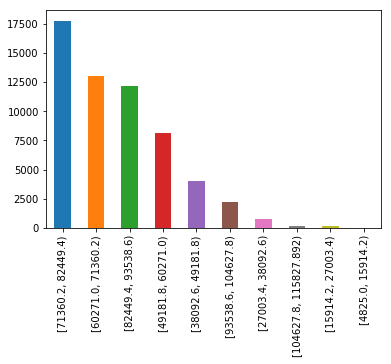

In [79]:
df_new.VehOdo_bin.value_counts().plot(kind='bar')

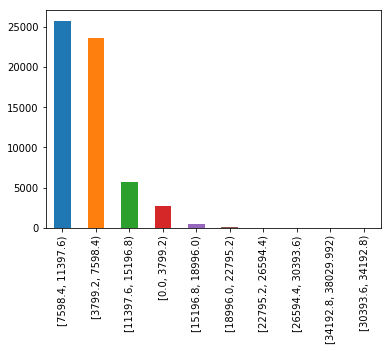

In [80]:
df_new.MMR_factor_bin.value_counts().plot(kind='bar') #10 bin selected

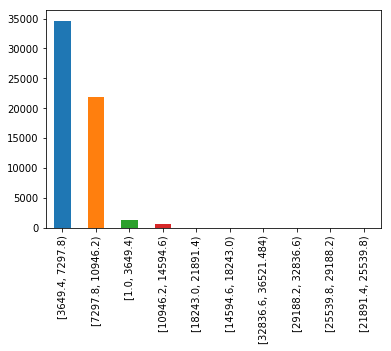

In [85]:
df_new.VehBCost_bin.value_counts().plot(kind='bar') #sturge 17 bin